In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix,classification_report

import tensorflow as tf
from tensorflow import keras

In [6]:
# dataset -> https://docs.google.com/spreadsheets/d/1sU5px5oYqBKBMNV3FVvhT-2DDmhRnqBHexw2MWPjCEs/edit?usp=sharing
df = pd.read_csv('Telco_Customer_Churn.csv')

In [7]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.drop('customerID',axis = 1, inplace = True)
# No need for this col ⚡

In [10]:
df['TotalCharges'].values # Strings 😑

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
df['MonthlyCharges'].values # Float 😊

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [13]:
# Let's convert the strings to integer
pd.to_numeric(df['TotalCharges']) 
# error 😭 because some values have space in them

ValueError: ignored

In [14]:
pd.to_numeric(df['TotalCharges'],errors='coerce') 
# telling it to ignore error and convert the value,
# where-ever sapce is encountered filling null

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [15]:
df[pd.to_numeric(df['TotalCharges'],errors='coerce').isnull()].shape

(11, 20)

In [16]:
df.shape
# 11/7043 -> 0.15 % data so we can drop it😁

(7043, 20)

In [17]:
df_new = df[df['TotalCharges'] != ' ']

In [18]:
df_new.shape

(7032, 20)

In [19]:
df_new['TotalCharges'] = pd.to_numeric(df_new['TotalCharges'])

<ipython-input-19-73f08b2eadeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['TotalCharges'] = pd.to_numeric(df_new['TotalCharges'])


<h3>
Here we can roughly observe that the customer with slightly high tenure are not churning, i.e. not turning away from us...
stay a little longer with me🐶
</h3>


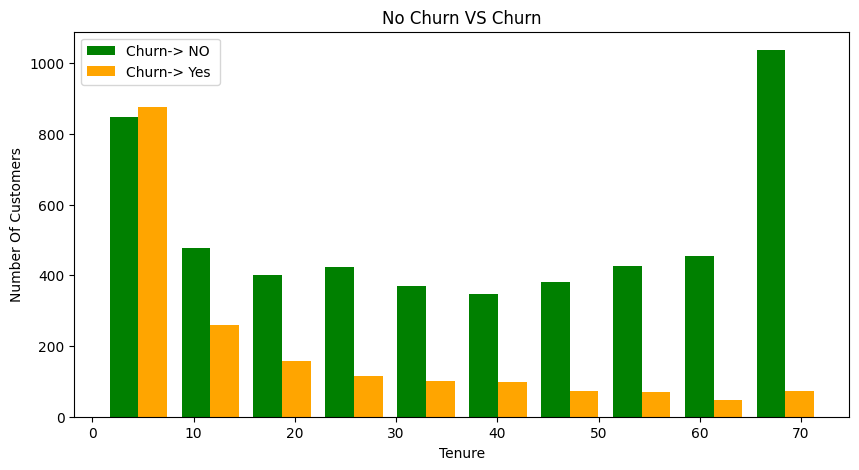

In [20]:
fig = plt.figure(figsize=(10,5))
plt.hist([df_new[df_new['Churn']=='No'].tenure, df_new[df_new['Churn']=='Yes'].tenure], color = ['green','orange'], label = ['Churn-> NO', 'Churn-> Yes ']);
plt.xlabel('Tenure')
plt.ylabel('Number Of Customers')
plt.title('No Churn VS Churn')
plt.legend();
# orange -> customer leaves
# green -> customer stays

In [21]:
fig.savefig('no_churn_VS_churn_tenure_hist.png')

In [22]:
# Doing as above for monthly charges
churn_no = df_new[df_new['Churn'] == 'No']
churn_yes = df_new[df_new['Churn'] == 'Yes']
churn_no = churn_no['MonthlyCharges']
churn_yes = churn_yes['MonthlyCharges']

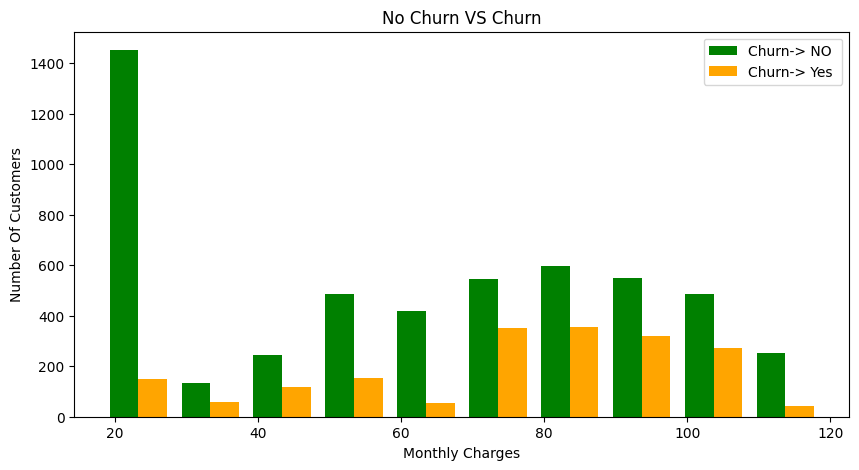

In [24]:
fig2 = plt.figure(figsize = (10,5))
plt.hist([churn_no,churn_yes],color=['green','orange'],label = ['Churn-> NO', 'Churn-> Yes ']);
plt.xlabel('Monthly Charges')
plt.ylabel('Number Of Customers')
plt.title('No Churn VS Churn')
plt.legend();
fig2.savefig('Monthly_churn_rate.png')

In [25]:
for col in df_new.columns:
  print(f'{col} => {df_new[col].unique()}')

gender => ['Female' 'Male']
SeniorCitizen => [0 1]
Partner => ['Yes' 'No']
Dependents => ['No' 'Yes']
tenure => [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService => ['No' 'Yes']
MultipleLines => ['No phone service' 'No' 'Yes']
InternetService => ['DSL' 'Fiber optic' 'No']
OnlineSecurity => ['No' 'Yes' 'No internet service']
OnlineBackup => ['Yes' 'No' 'No internet service']
DeviceProtection => ['No' 'Yes' 'No internet service']
TechSupport => ['No' 'Yes' 'No internet service']
StreamingTV => ['No' 'Yes' 'No internet service']
StreamingMovies => ['No' 'Yes' 'No internet service']
Contract => ['Month-to-month' 'One year' 'Two year']
PaperlessBilling => ['Yes' 'No']
PaymentMethod => ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges => [29.85 56.95 53.85 

In [26]:
# here we can observe that in some place there is 'No .... Service'
# so we will replace it with 'NO'
df_new.replace('No internet service','No',inplace=True)
df_new.replace('No phone service','No',inplace=True)

<ipython-input-26-59e8d9062f78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace('No internet service','No',inplace=True)
<ipython-input-26-59e8d9062f78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace('No phone service','No',inplace=True)


In [27]:
for col in df_new.columns:
  print(f'{col} => {df_new[col].unique()}')

gender => ['Female' 'Male']
SeniorCitizen => [0 1]
Partner => ['Yes' 'No']
Dependents => ['No' 'Yes']
tenure => [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService => ['No' 'Yes']
MultipleLines => ['No' 'Yes']
InternetService => ['DSL' 'Fiber optic' 'No']
OnlineSecurity => ['No' 'Yes']
OnlineBackup => ['Yes' 'No']
DeviceProtection => ['No' 'Yes']
TechSupport => ['No' 'Yes']
StreamingTV => ['No' 'Yes']
StreamingMovies => ['No' 'Yes']
Contract => ['Month-to-month' 'One year' 'Two year']
PaperlessBilling => ['Yes' 'No']
PaymentMethod => ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges => [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges => [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn => ['No' 'Yes']


In [29]:
df_new.replace({'Yes':1,'No':0},inplace=True)
# Replacing yes with one and no with zero
df_new['InternetService'].replace(0,'No',inplace = True)
df_new.replace({'Male':1,'Female':0},inplace=True)

<ipython-input-29-474e4bde8dc7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace({'Yes':1,'No':0},inplace=True)
<ipython-input-29-474e4bde8dc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['InternetService'].replace(0,'No',inplace = True)
<ipython-input-29-474e4bde8dc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace({'Male':1,'Female':0},inplace=True)


In [30]:
# df2 = pd.get_dummies(data=df_new, columns = ['InternetService','Contract','PaymentMethod'],drop_first=True)
df2 = pd.get_dummies(data=df_new, columns = ['InternetService','Contract','PaymentMethod'])

In [31]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [32]:
df2.sample(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5368,0,1,0,0,3,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [33]:
X = df2.drop('Churn',axis = 'columns')
y = df2['Churn']

In [34]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.25,stratify = y, random_state = 0)

In [94]:
def create_model(x):
  model = keras.Sequential()
  model.add(keras.layers.Dense(len(x.columns), input_shape=(26,), activation='relu'))
  model.add(keras.layers.Dense(10,activation = 'relu'))
  model.add(keras.layers.Dense(5,activation = 'relu'))
  model.add(keras.layers.Dense(1,activation = 'sigmoid'))

  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model

def conv_to_bin(l):
  return [ 1 if i > 0.5 else 0 for i in l]

In [90]:
model = create_model(X_train)
model.fit(X_train,y_train, epochs = 100)

Epoch 1/100
165/165 [==============================] - 1s 1ms/step - loss: 3.3931 - accuracy: 0.6883
Epoch 2/100
165/165 [==============================] - 0s 1ms/step - loss: 1.2030 - accuracy: 0.7376
Epoch 3/100
165/165 [==============================] - 0s 1ms/step - loss: 2.0183 - accuracy: 0.7323
Epoch 4/100
165/165 [==============================] - 0s 1ms/step - loss: 1.1960 - accuracy: 0.7484
Epoch 5/100
165/165 [==============================] - 0s 1ms/step - loss: 1.1676 - accuracy: 0.7516
Epoch 6/100
165/165 [==============================] - 0s 2ms/step - loss: 1.0586 - accuracy: 0.7552
Epoch 7/100
165/165 [==============================] - 0s 2ms/step - loss: 1.7565 - accuracy: 0.7387
Epoch 8/100
165/165 [==============================] - 0s 2ms/step - loss: 1.0487 - accuracy: 0.7600
Epoch 9/100
165/165 [==============================] - 0s 2ms/step - loss: 1.5624 - accuracy: 0.7459
Epoch 10/100
165/165 [==============================] - 0s 2ms/step - loss: 1.1351 - accura

In [91]:
model.evaluate(X_test,y_test)

55/55 [==============================] - 0s 1ms/step - loss: 0.5586 - accuracy: 0.7969


[0.5586020350456238, 0.796928346157074]

In [92]:
y_pred = model.predict(X_test)
y_pred[:2] # -> non-binary 😑, but y_test is binary

55/55 [==============================] - 0s 839us/step


array([[0.06237733],
       [0.5801331 ]], dtype=float32)

In [95]:
y_pred_bin = conv_to_bin(y_pred)

In [96]:
print(classification_report(y_test,y_pred_bin)) 
# use print to get proper formatting

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1291
           1       0.65      0.52      0.58       467

    accuracy                           0.80      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758



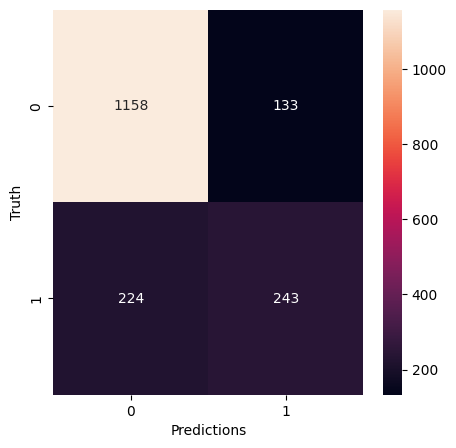

In [97]:
conf_mat = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_bin)
fig3 = plt.figure(figsize = (5,5))
sns.heatmap(conf_mat,annot = True,fmt = 'd')
plt.xlabel('Predictions')
plt.ylabel('Truth')
fig3.savefig('conf_mat.png')